

```
# This is formatted as code
```

# I. Read Data & Import Library

In [1]:
# Import library yang digunakan
import pandas as pd

# Eksekusi sintaks berikut untuk meng-custom tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# Proses ekstraksi data
url = "/content/StudentMentalHealth_dirty.csv"
data_mentalhealth = pd.read_csv(url)

In [3]:
# Tampilkan hasilnya
display(data_mentalhealth.head())

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15.0,Class 8,7.1,8.90,9.30,Medium,No,Same
1,Meera,Female,25.0,MSc,3.3,-5.00,0.20,Medium,No,Same
2,Ishaan,Male,20.0,BTech,9.5,150.00,6.20,Medium,No,Same
3,Aditya,Male,20.0,BA,10.8,5.60,5.50,High,Yes,Same
4,Anika,Female,17.0,Class 11,2.8,5.40,3.10,Medium,Yes,Same


# II. Data Cleaning & Transformation
2.1 Standarisasi Format Nilai

2.2 Handling Missing Value

2.3 Duplikasi Data

2.4 Handling Outlier

In [7]:
# Tampilkan Informasi Umum Data
data_mentalhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1240 non-null   object 
 1   Gender                        1239 non-null   object 
 2   Age                           1240 non-null   object 
 3   Education Level               1240 non-null   object 
 4   Screen Time (hrs/day)         1236 non-null   object 
 5   Sleep Duration (hrs)          1232 non-null   float64
 6   Physical Activity (hrs/week)  1243 non-null   float64
 7   Stress Level                  1238 non-null   object 
 8   Anxious Before Exams          1233 non-null   object 
 9   Academic Performance Change   1235 non-null   object 
dtypes: float64(2), object(8)
memory usage: 97.8+ KB


In [9]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00


In [10]:
# Import Library Data Profiling
import ydata_profiling as yp

# Dapatkan summary report
profile = yp.ProfileReport(data_mentalhealth,
                           title = 'Laporan Student Mental Health')

# Simpan report ke file HTML
profile.to_file('profiling_report_mentalhealth.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 30.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Cek Nama Kolom
print(data_mentalhealth.columns.tolist())
data_mentalhealth.columns = data_mentalhealth.columns.str.strip()

['Name', 'Gender', 'Age', 'Education Level', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']


In [12]:
# 2.2 Handling Missing Value Name (1/2)
# Periksa Size Data Sebelum
display(data_mentalhealth.shape)

(1250, 10)

In [13]:
# Drop NA Name
data_mentalhealth=data_mentalhealth.dropna(subset=['Name'])
# Periksa Size Data Setelah
display(data_mentalhealth.shape)

(1240, 10)

In [14]:
# 2.2 Handling Missing Value Age/Screen Time/Sleep Duration/Physical Activity (2/2)
cols_numeric = [
    'Age',
    'Screen Time (hrs/day)',
    'Sleep Duration (hrs)',
    'Physical Activity (hrs/week)'
]

for c in cols_numeric:
    data_mentalhealth.loc[:, c] = pd.to_numeric(
        data_mentalhealth[c], errors='coerce'
    )
# Hapus data Age/Screen Time/Sleep Duration/Physical Activity yang kosong
data_mentalhealth = data_mentalhealth.dropna(subset=cols_numeric).reset_index(drop=True)

In [15]:
# 2.1 Standarisasi Format Nilai
# Transformasi Tipe Data
data_mentalhealth=data_mentalhealth.astype({
    'Age': pd.Int64Dtype(),
    'Screen Time (hrs/day)': pd.Float64Dtype(),
    'Sleep Duration (hrs)': pd.Float64Dtype(),
    'Physical Activity (hrs/week)': pd.Float64Dtype()
})


In [16]:
# 2.3 Duplikasi Data (1/2)
# Definisi duplikasi
dup_cols = data_mentalhealth.loc[
    :,
    'Name':'Academic Performance Change'
].columns.tolist()
data_mentalhealth.duplicated(subset=dup_cols).sum()

# Periksa Size Data Sebelum
display(data_mentalhealth.shape)

(1193, 10)

In [17]:
# 2.3 Duplikasi Data (2/2)
# Simpan 1 duplikat data
data_mentalhealth = data_mentalhealth.drop_duplicates(subset=dup_cols, keep='first')

# Periksa Size Data Setelah
display(data_mentalhealth.shape)

(1015, 10)

In [18]:
# 2.4 Handling Outlier (1/3)
# Ketentuan Outlier (Asumsi)
rules = {
    'Age': (0, 90),
    'Screen Time (hrs/day)': (0, 24),
    'Sleep Duration (hrs)': (0, 24),
    'Physical Activity (hrs/week)': (0, 40)
}
# Identifikasi Outlier dan Jumlah Outlier
outlier_counts = {}

for col, (low, high) in rules.items():
    mask = (data_mentalhealth[col] < low) | (data_mentalhealth[col] > high)
    outlier_counts[col] = mask.sum()

pd.Series(outlier_counts, name="outlier_count")

,outlier_count
Age,11
Screen Time (hrs/day),19
Sleep Duration (hrs),31
Physical Activity (hrs/week),27


In [19]:
# 2.4 Handling Outlier (2/3)
# Tampilkan Outlier
mask_all = False
for col, (low, high) in rules.items():
    mask_all |= (data_mentalhealth[col] < low) | (data_mentalhealth[col] > high)

outlier_rows = data_mentalhealth[mask_all]
display(outlier_rows)

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
1,Meera,Female,25,MSc,3.30,-5.00,0.20,Medium,No,Same
2,Ishaan,Male,20,BTech,9.50,150.00,6.20,Medium,No,Same
11,Myra,Female,150,Class 10,5.80,4.40,6.70,High,No,Same
31,Kavya,Female,19,BA,9.50,150.00,1.10,High,Yes,Same
44,Rishi,Other,200,Class 10,9.40,6.20,5.10,Medium,Yes,Declined
47,Vihaan,Male,21,BTech,8.00,8.50,99.00,High,No,Declined
57,Reyansh,Male,16,Class 10,2.20,4.50,150.00,NaN,No,Same
71,Sai,Male,26,MSc,4.10,-5.00,9.80,Medium,No,NaN
85,Vivaan,Male,150,MA,5.80,6.80,2.90,Low,Yes,Same
86,Riya,Female,19,BSc,4.60,99.00,3.60,Low,No,Declined


In [20]:
# 2.4 Handling Outlier (3/3)
# Drop Data Outlier
mask_valid = True
for col, (low, high) in rules.items():
    mask_valid &= data_mentalhealth[col].between(low, high)

data_mentalhealth = data_mentalhealth[mask_valid].reset_index(drop=True)

In [21]:
# Periksa Size Data Setelah
display(data_mentalhealth.shape)

(928, 10)

In [23]:
# 2.2 Handling Missing Value dengan Imputasi Data (1/3)
# Identifikasi N/A di Kolom Cols Cat
cols_cat = [
    'Gender',
    'Education Level',
    'Stress Level',
    'Anxious Before Exams',
    'Academic Performance Change'
]

data_mentalhealth[cols_cat].isna().sum()

,0
Gender,11
Education Level,7
Stress Level,9
Anxious Before Exams,17
Academic Performance Change,13


In [24]:
# 2.2 Handling Missing Value dengan Imputasi Data (2/3)
# Tampilkan Data NA
data_mentalhealth[data_mentalhealth[cols_cat].isna().any(axis=1)]

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
13,Diya,NaN,18,Class 11,7.00,4.80,9.90,Low,Yes,Declined
35,Kavya,NaN,23,MA,5.60,8.10,5.50,Medium,Yes,Same
56,Riya,Female,20,BTech,3.30,8.10,9.40,NaN,Yes,Same
74,Anika,Female,24,MSc,10.50,4.10,5.20,Medium,No,NaN
110,Aadhya,Female,26,MTech,6.30,4.60,3.30,NaN,Yes,Same
143,Vihaan,Male,25,NaN,8.40,4.20,1.70,High,No,Improved
158,Diya,Female,21,MSc,4.90,7.50,0.30,Low,Yes,NaN
171,Aadhya,NaN,25,MTech,8.20,8.00,8.10,Medium,No,Improved
186,Saanvi,Female,21,BSc,8.20,8.20,6.10,NaN,No,Declined
208,Reyansh,Male,21,NaN,11.70,5.70,8.70,Medium,No,Improved


In [25]:
# 2.2 Handling Missing Value dengan Imputasi Data (3/3)
# Isi Data NA dengan ketenuan berikut
# Gender NA → Other
data_mentalhealth.loc[:, 'Gender'] = data_mentalhealth['Gender'].fillna('Other')

# Education Level NA → modus (nilai paling sering)
edu_mode = data_mentalhealth['Education Level'].mode()[0]
data_mentalhealth.loc[:, 'Education Level'] = data_mentalhealth['Education Level'].fillna(edu_mode)

# Stress Level NA → Medium
data_mentalhealth.loc[:, 'Stress Level'] = data_mentalhealth['Stress Level'].fillna('Medium')

# Anxious Before Exams NA → No
data_mentalhealth.loc[:, 'Anxious Before Exams'] = data_mentalhealth['Anxious Before Exams'].fillna('No')

# Academic Performance Change NA → Same
data_mentalhealth.loc[:, 'Academic Performance Change'] = data_mentalhealth[
    'Academic Performance Change'
].fillna('Same')

# III. EDA & Visualisasi

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

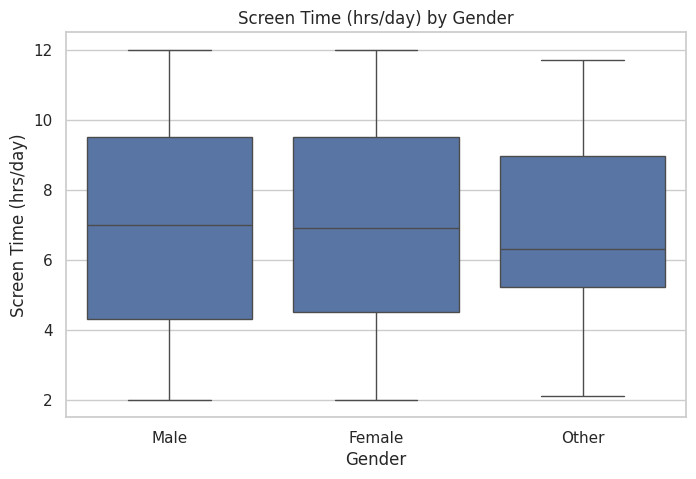

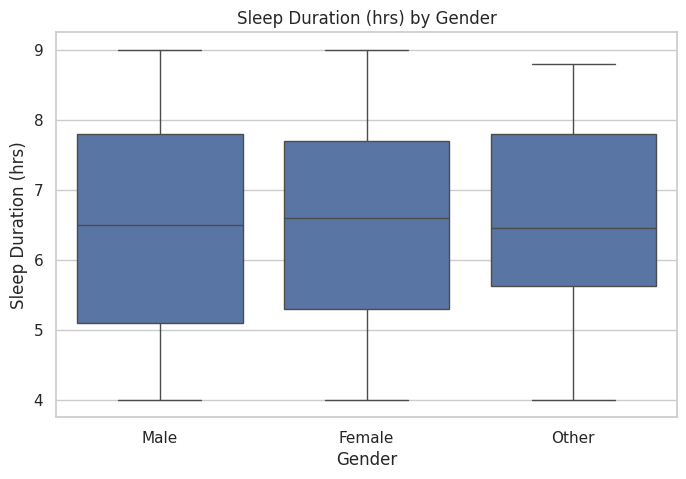

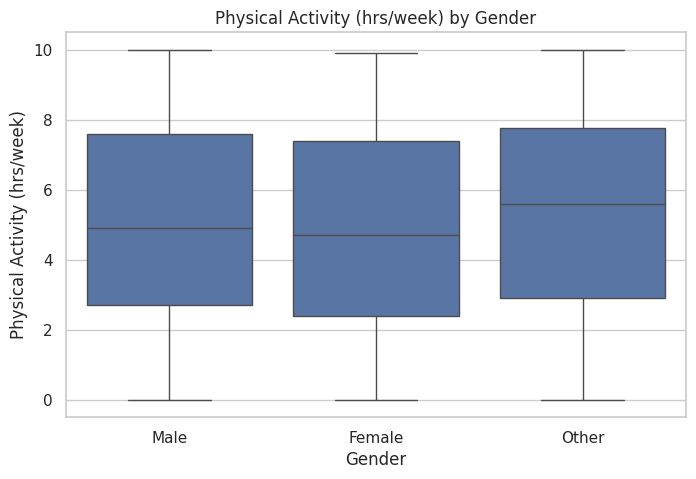

In [27]:
# Hubungan Demografi dengan Perilaku
for y in [
    'Screen Time (hrs/day)',
    'Sleep Duration (hrs)',
    'Physical Activity (hrs/week)'
]:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=data_mentalhealth,
        x='Gender',
        y=y
    )
    plt.title(f'{y} by Gender')
    plt.show()

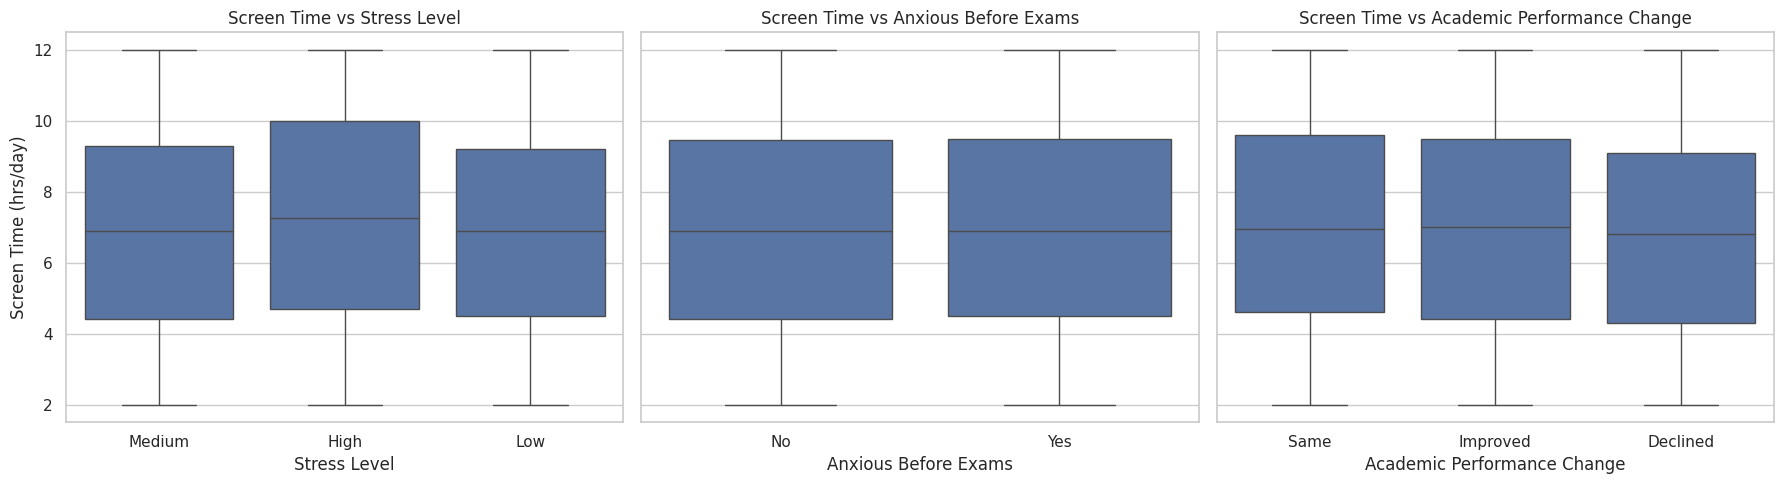

In [28]:
# Hubungan Screen Time dengan Stress Level, Anxious Before Exams, dan Academic Performance Change
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.boxplot(
    data=data_mentalhealth,
    x='Stress Level',
    y='Screen Time (hrs/day)',
    ax=axes[0]
)
axes[0].set_title('Screen Time vs Stress Level')

sns.boxplot(
    data=data_mentalhealth,
    x='Anxious Before Exams',
    y='Screen Time (hrs/day)',
    ax=axes[1]
)
axes[1].set_title('Screen Time vs Anxious Before Exams')

sns.boxplot(
    data=data_mentalhealth,
    x='Academic Performance Change',
    y='Screen Time (hrs/day)',
    ax=axes[2]
)
axes[2].set_title('Screen Time vs Academic Performance Change')

plt.tight_layout()
plt.show()

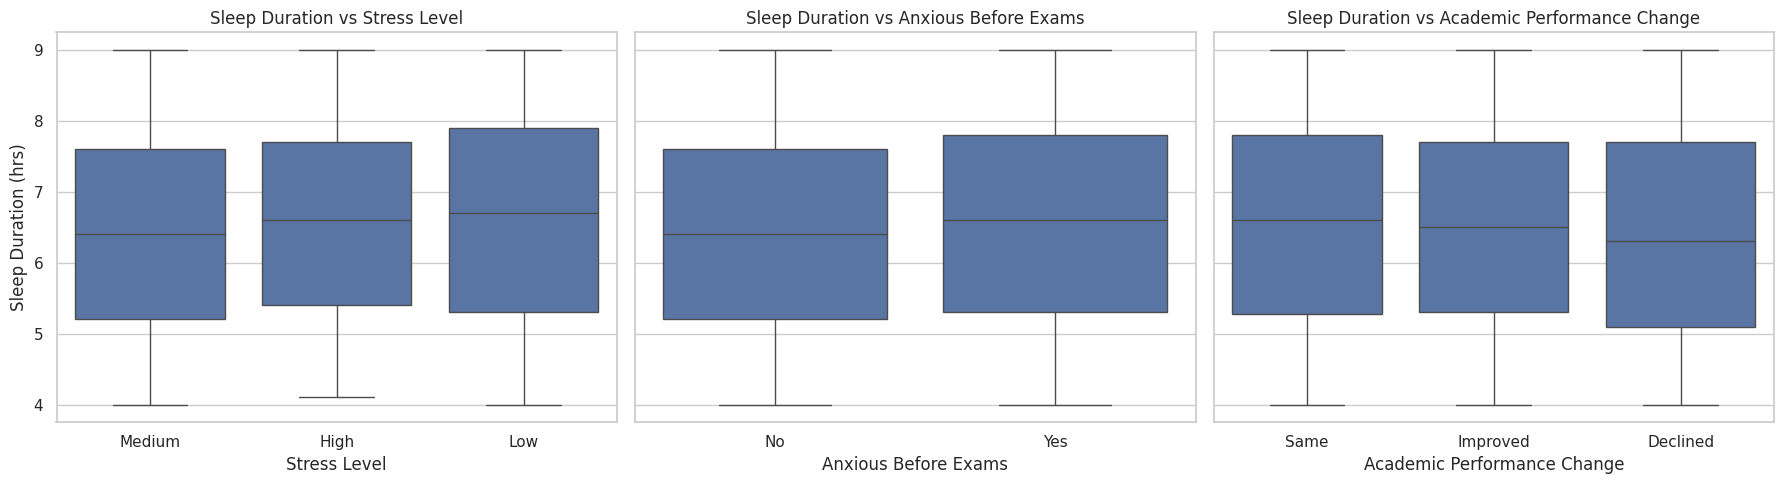

In [29]:
# Hubungan Screen Time dengan Stress Level, Anxious Before Exams, dan Academic Performance Change
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.boxplot(
    data=data_mentalhealth,
    x='Stress Level',
    y='Sleep Duration (hrs)',
    ax=axes[0]
)
axes[0].set_title('Sleep Duration vs Stress Level')

sns.boxplot(
    data=data_mentalhealth,
    x='Anxious Before Exams',
    y='Sleep Duration (hrs)',
    ax=axes[1]
)
axes[1].set_title('Sleep Duration vs Anxious Before Exams')

sns.boxplot(
    data=data_mentalhealth,
    x='Academic Performance Change',
    y='Sleep Duration (hrs)',
    ax=axes[2]
)
axes[2].set_title('Sleep Duration vs Academic Performance Change')

plt.tight_layout()
plt.show()

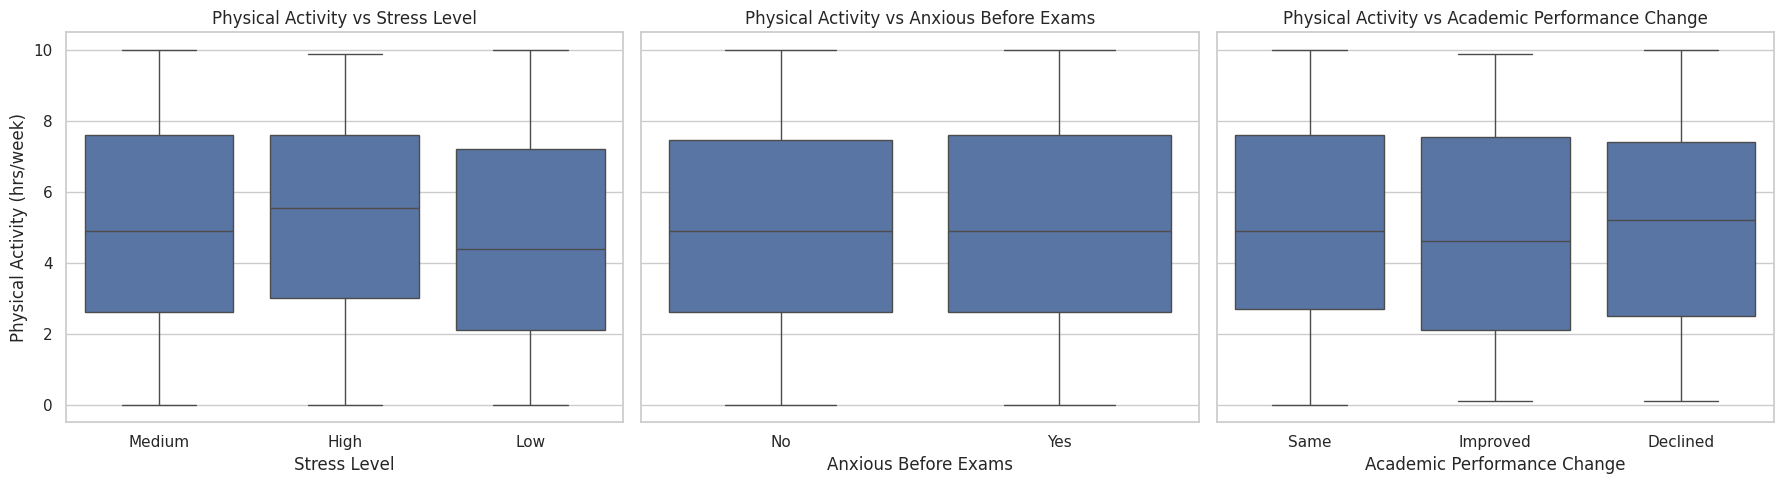

In [30]:
# Hubungan Physical Activity (hrs/week) dengan Stress Level, Anxious Before Exams, dan Academic Performance Change
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.boxplot(
    data=data_mentalhealth,
    x='Stress Level',
    y='Physical Activity (hrs/week)',
    ax=axes[0]
)
axes[0].set_title('Physical Activity vs Stress Level')

sns.boxplot(
    data=data_mentalhealth,
    x='Anxious Before Exams',
    y='Physical Activity (hrs/week)',
    ax=axes[1]
)
axes[1].set_title('Physical Activity vs Anxious Before Exams')

sns.boxplot(
    data=data_mentalhealth,
    x='Academic Performance Change',
    y='Physical Activity (hrs/week)',
    ax=axes[2]
)
axes[2].set_title('Physical Activity vs Academic Performance Change')

plt.tight_layout()
plt.show()

In [31]:
# Set urutan kategori Stress Level
data_mentalhealth['Stress Level'] = pd.Categorical(
    data_mentalhealth['Stress Level'],
    categories=['High', 'Medium', 'Low'],
    ordered=True
)

# Buat tabel ringkasan
summary_stress = (
    data_mentalhealth
    .groupby('Stress Level')
    .agg({
        'Screen Time (hrs/day)': ['mean', 'median'],
        'Sleep Duration (hrs)': ['mean', 'median'],
        'Physical Activity (hrs/week)': ['mean', 'median']
    })
)

# Rapikan nama kolom
summary_stress.columns = [
    'Screen Time Mean', 'Screen Time Median',
    'Sleep Duration Mean', 'Sleep Duration Median',
    'Physical Activity Mean', 'Physical Activity Median'
]

summary_stress = summary_stress.reset_index()

display(summary_stress)


/tmp/ipython-input-610458864.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Stress Level')


,Stress Level,Screen Time Mean,Screen Time Median,Sleep Duration Mean,Sleep Duration Median,Physical Activity Mean,Physical Activity Median
0,High,7.21,7.25,6.53,6.60,5.22,5.55
1,Medium,6.84,6.90,6.42,6.40,5.10,4.90
2,Low,6.83,6.90,6.57,6.70,4.69,4.40


In [32]:
# Summary Anxious Before Exam
data_mentalhealth['Anxious Before Exams'] = pd.Categorical(
    data_mentalhealth['Anxious Before Exams'],
    categories=['Yes', 'No'],
    ordered=True
)

summary_anxious = (
    data_mentalhealth
    .groupby('Anxious Before Exams')
    .agg({
        'Screen Time (hrs/day)': ['mean', 'median'],
        'Sleep Duration (hrs)': ['mean', 'median'],
        'Physical Activity (hrs/week)': ['mean', 'median']
    })
)

# Rapikan kolom
summary_anxious.columns = [
    'Screen Time Mean', 'Screen Time Median',
    'Sleep Duration Mean', 'Sleep Duration Median',
    'Physical Activity Mean', 'Physical Activity Median'
]

summary_anxious = summary_anxious.reset_index()

display(summary_anxious)

/tmp/ipython-input-2260952137.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Anxious Before Exams')


,Anxious Before Exams,Screen Time Mean,Screen Time Median,Sleep Duration Mean,Sleep Duration Median,Physical Activity Mean,Physical Activity Median
0,Yes,6.91,6.90,6.53,6.60,4.97,4.90
1,No,6.90,6.90,6.44,6.40,5.00,4.90


In [33]:
# Set urutan kategori
data_mentalhealth['Academic Performance Change'] = pd.Categorical(
    data_mentalhealth['Academic Performance Change'],
    categories=['Declined', 'Same', 'Improved'],
    ordered=True
)

summary_academic = (
    data_mentalhealth
    .groupby('Academic Performance Change')
    .agg({
        'Screen Time (hrs/day)': ['mean', 'median'],
        'Sleep Duration (hrs)': ['mean', 'median'],
        'Physical Activity (hrs/week)': ['mean', 'median']
    })
)

# Rapikan kolom
summary_academic.columns = [
    'Screen Time Mean', 'Screen Time Median',
    'Sleep Duration Mean', 'Sleep Duration Median',
    'Physical Activity Mean', 'Physical Activity Median'
]

summary_academic = summary_academic.reset_index()

display(summary_academic)

/tmp/ipython-input-2046102585.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Academic Performance Change')


,Academic Performance Change,Screen Time Mean,Screen Time Median,Sleep Duration Mean,Sleep Duration Median,Physical Activity Mean,Physical Activity Median
0,Declined,6.73,6.80,6.41,6.30,5.07,5.20
1,Same,7.01,6.95,6.55,6.60,5.04,4.90
2,Improved,6.92,7.00,6.49,6.50,4.82,4.60


# IV. Data Prerocessing

In [34]:
# Backup data cleaned
data_mentalhealth_backup = data_mentalhealth.copy(deep=True)

In [69]:
# Copy data frame
data_preprocessing = data_mentalhealth.copy()

# Tampilkan hasilnya
data_preprocessing.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.10,8.90,9.30,Medium,No,Same
1,Aditya,Male,20,BA,10.80,5.60,5.50,High,Yes,Same
2,Anika,Female,17,Class 11,2.80,5.40,3.10,Medium,Yes,Same
3,Aditya,Male,23,MSc,8.60,8.40,0.10,Low,No,Improved
4,Vivaan,Male,22,MTech,3.60,6.60,0.50,Medium,Yes,Improved


In [70]:
# Buat list kolom yang akan dihapus
list_drop_columns = ['Education Level']

# Proses hapus kolom
data_preprocessing = data_preprocessing.drop(columns = list_drop_columns)

# Tampilkan hasil
data_preprocessing.head()

,Name,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,7.10,8.90,9.30,Medium,No,Same
1,Aditya,Male,20,10.80,5.60,5.50,High,Yes,Same
2,Anika,Female,17,2.80,5.40,3.10,Medium,Yes,Same
3,Aditya,Male,23,8.60,8.40,0.10,Low,No,Improved
4,Vivaan,Male,22,3.60,6.60,0.50,Medium,Yes,Improved


In [71]:
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Name                          928 non-null    object  
 1   Gender                        928 non-null    object  
 2   Age                           928 non-null    Int64   
 3   Screen Time (hrs/day)         928 non-null    Float64 
 4   Sleep Duration (hrs)          928 non-null    Float64 
 5   Physical Activity (hrs/week)  928 non-null    Float64 
 6   Stress Level                  928 non-null    category
 7   Anxious Before Exams          928 non-null    category
 8   Academic Performance Change   928 non-null    category
dtypes: Float64(3), Int64(1), category(3), object(2)
memory usage: 50.4+ KB


In [72]:
# Buat daftar kolom kategorik dan buat menjadi list
kolom_kategorik = ['Gender']

# Tampilkan hasilnya
print(kolom_kategorik)

['Gender']


In [73]:
# Kolom yang akan diubah
data_preprocessing[kolom_kategorik]

,Gender
0,Male
1,Male
2,Female
3,Male
4,Male
5,Male
6,Male
7,Female
8,Male
9,Female


In [74]:
# Import library yang dibutuhkan
from sklearn.preprocessing import OrdinalEncoder

# Panggil objek OrdinalEncoder
ord_enc = OrdinalEncoder()

# Terapkan
data_preprocessing[kolom_kategorik] = ord_enc.fit_transform(data_preprocessing[kolom_kategorik])

# Tampilkan hasilnya
display(data_preprocessing)

,Name,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,1.00,15,7.10,8.90,9.30,Medium,No,Same
1,Aditya,1.00,20,10.80,5.60,5.50,High,Yes,Same
2,Anika,0.00,17,2.80,5.40,3.10,Medium,Yes,Same
3,Aditya,1.00,23,8.60,8.40,0.10,Low,No,Improved
4,Vivaan,1.00,22,3.60,6.60,0.50,Medium,Yes,Improved
5,Arjun,1.00,25,7.00,4.70,4.50,Medium,No,Same
6,Sai,1.00,20,4.80,5.00,7.90,Medium,No,Improved
7,Kavya,0.00,15,8.00,7.30,0.80,Low,No,Same
8,Sai,1.00,23,10.30,8.80,3.70,High,Yes,Same
9,Meera,0.00,23,11.20,4.30,1.40,Low,No,Improved


In [75]:
# Hitung jumlah setiap gender (0 -> male; 1 -> female; 2 -> other)
data_preprocessing['Gender'].value_counts()

,count
Gender,
0.00,437
1.00,433
2.00,58


In [76]:
# Hitung kolom dengan dtype category
from IPython.display import display

display(data_preprocessing['Stress Level'].value_counts())
display(data_preprocessing['Anxious Before Exams'].value_counts())
display(data_preprocessing['Academic Performance Change'].value_counts())

,count
Stress Level,
Medium,461
Low,305
High,162


,count
Anxious Before Exams,
Yes,477
No,451


,count
Academic Performance Change,
Same,380
Improved,275
Declined,273


In [77]:
# Mapping Stress Level

# Lakukan proses mapping ubah jadi kategori berurutan, lalu ambil codes (Low=0, Medium=1, High=2)
data_preprocessing['Stress Level'] = pd.Categorical(
    data_preprocessing['Stress Level'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
).codes

# Tampilkan hasilnya
data_preprocessing.head()

,Name,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,1.00,15,7.10,8.90,9.30,1,No,Same
1,Aditya,1.00,20,10.80,5.60,5.50,2,Yes,Same
2,Anika,0.00,17,2.80,5.40,3.10,1,Yes,Same
3,Aditya,1.00,23,8.60,8.40,0.10,0,No,Improved
4,Vivaan,1.00,22,3.60,6.60,0.50,1,Yes,Improved


In [78]:
# Mapping Academic Performance Change

# Lakukan proses mapping ubah jadi kategori berurutan, lalu ambil codes (Declined=0, Same=1, Improve=2)
data_preprocessing['Academic Performance Change'] = pd.Categorical(
    data_preprocessing['Academic Performance Change'],
    categories=['Declined', 'Same', 'Improved'],
    ordered=True
).codes

# Tampilkan hasilnya
data_preprocessing.head()

,Name,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,1.00,15,7.10,8.90,9.30,1,No,1
1,Aditya,1.00,20,10.80,5.60,5.50,2,Yes,1
2,Anika,0.00,17,2.80,5.40,3.10,1,Yes,1
3,Aditya,1.00,23,8.60,8.40,0.10,0,No,2
4,Vivaan,1.00,22,3.60,6.60,0.50,1,Yes,2


In [84]:
# Mapping Anxious Before Exams

# Lakukan proses mapping ubah jadi kategori berurutan, lalu ambil codes (Yes=0, No=1)
data_preprocessing['Anxious Before Exams'] = pd.Categorical(
    data_preprocessing['Anxious Before Exams'],
    categories=['No', 'Yes'],
    ordered=True
).codes

# Tampilkan hasilnya
data_preprocessing.head()

,Name,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,1.00,15,7.10,8.90,9.30,1,0,1
1,Aditya,1.00,20,10.80,5.60,5.50,2,1,1
2,Anika,0.00,17,2.80,5.40,3.10,1,1,1
3,Aditya,1.00,23,8.60,8.40,0.10,0,0,2
4,Vivaan,1.00,22,3.60,6.60,0.50,1,1,2


In [85]:
# Splitting Data
from sklearn.model_selection import train_test_split

# Variable x untuk fitur dan y untuk target
X = data_preprocessing.drop(columns=['Name','Academic Performance Change'])
y = data_preprocessing['Academic Performance Change']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [60]:
# Total data
X.shape

(928, 7)

In [61]:
# Total data yang dipelajari
X_train.shape

(742, 7)

In [62]:
# Total data yang diuji
X_test.shape

(186, 7)

In [86]:
# Scalling Data
from sklearn.preprocessing import StandardScaler
# Definisi kolom numerik
num_cols = [
    'Age',
    'Screen Time (hrs/day)',
    'Sleep Duration (hrs)',
    'Physical Activity (hrs/week)'
]

scaler = StandardScaler()

# Terapkan pada X_train dan X_test
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# Tampilkan hasilnya
display(X_train)

,Gender,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams
280,1.00,-0.53,-0.48,-1.36,-1.05,0,1
630,1.00,-0.78,0.01,1.20,-0.91,1,1
541,0.00,-0.53,0.42,-0.60,-1.35,1,0
21,0.00,1.47,-0.79,0.23,1.58,1,1
0,1.00,-1.28,0.04,1.69,1.48,1,0
750,0.00,-1.28,1.22,1.20,0.04,0,0
158,0.00,0.22,-0.72,0.72,-1.59,0,1
742,1.00,0.47,1.33,-1.64,1.20,0,1
709,0.00,1.47,-0.72,0.86,1.34,1,1
815,1.00,1.22,-0.27,-1.43,1.58,0,1


In [87]:
# Tampilkan frekuensi kemunculan target
display(y_train.value_counts())

,count
Academic Performance Change,
1,304
2,220
0,218


# V. Data Modelling

In [88]:
# Import library
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [89]:
# Proses prediksi
y_pred = logreg.predict(X_test)

In [91]:
# Confusion Matrix Academic Performance Exchange
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot dengan Plotly
fig = px.imshow(
    cm,
    text_auto=True,
    color_continuous_scale="Blues",
    title="<b>Confusion Matrix – Logistic Regression</b>"
)

# Update sumbu X (Predicted)
fig.update_xaxes(
    tickmode="array",
    tickvals=[0, 1, 2],
    ticktext=["Declined", "Same", "Improved"],
    title_text="Predicted Label"
)

# Update sumbu Y (Actual)
fig.update_yaxes(
    tickmode="array",
    tickvals=[0, 1, 2],
    ticktext=["Declined", "Same", "Improved"],
    title_text="Actual Label",
    tickangle=0
)

# Hilangkan colorbar
fig.update_layout(
    coloraxis_showscale=False,
    width=600,
    height=500
)

fig.show()

In [92]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.3548387096774194

Classification Report:

              precision    recall  f1-score   support

           0       0.29      0.07      0.12        55
           1       0.39      0.78      0.52        76
           2       0.16      0.05      0.08        55

    accuracy                           0.35       186
   macro avg       0.28      0.30      0.24       186
weighted avg       0.29      0.35      0.27       186



In [93]:
# Feature Importance
# Import library
import numpy as np
import pandas as pd

# Pastikan X_train adalah DataFrame dan logreg sudah fit
coef = logreg.coef_  # shape: (n_classes, n_features)

# Urutkan data
feat_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": np.mean(np.abs(coef), axis=0)
}).sort_values(by="Importance", ascending=False)

# Tampilkan
display(feat_importance)


,Feature,Importance
6,Anxious Before Exams,0.12
5,Stress Level,0.09
3,Sleep Duration (hrs),0.06
2,Screen Time (hrs/day),0.05
4,Physical Activity (hrs/week),0.04
1,Age,0.03
0,Gender,0.03


# IV. Kesimpulan

Akurasi model secara keseluruhan adalah 35%.

Berdasarkan Confusion Matrix, yang digunakan untuk mengevaluasi performa model Logistic Regression, model mampu mengklasifikasikan kelas Same dengan cukup baik, namun masih terdapat kesalahan klasifikasi antara kelas Declined dan Improved.
Hal ini mengindikasikan adanya keterbatasan Logistic Regression dalam mempelajari ciri mahasiswa di kelas Declined, Same, dan Improved saling tumpang-tindih/bercampur.

Oleh karena itu, Logistic Regression dapat digunakan sebagai model sederhana pertama yang dipakai sebagai titik awal evaluasi. Sementara itu, model non-linear dapat dipertimbangkan untuk peningkatan performa data model di tahap selanjutnya.

Hasil analisis feature importance menunjukkan bahwa variabel Anxious Before Exams dan Stress Level merupakan faktor yang paling berpengaruh dalam memprediksi perubahan performa akademik mahasiswa. Sebaliknya, variabel demografis memiliki kontribusi yang relatif kecil. Hal ini mengindikasikan bahwa faktor psikologis berperan lebih dominan dibandingkan faktor demografis.

<br>
<a href="https://www.linkedin.com/in/levana-bernadetta/"><img src="https://img.shields.io/badge/-© 2025 Levana Bernadetta-F54927?style=for-the-badge&logoColor=white"/></a>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/main/Image/Materi-Python/FINAL LOGO GSB 2025 - ADV (Buat IG, TikTok, Podcast) (2).png" align="left" width="15%" /></a>